# Biomolecular modeling laboratory


In [11]:
import numpy as np
import collections
import pandas as pd
from scipy.signal import correlate


In [7]:

reference_sequence = 'KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL'


'T'

In [12]:
def get_sequences(filename: str):
    alignments = open(filename)
    lines = alignments.readlines()
    n_lines = len(lines)

    sequences = []

    for idx, line in enumerate(lines):
        if line.startswith('>'):
            current_sequence = ""
            i = 1
            while (idx + i) < n_lines and not lines[idx + i].startswith('>'):  # continua fino alla prossima '>'
                current_sequence += lines[idx + i].strip()  # rimuove newline
                i += 1
            sequences.append(current_sequence)


    # number_of_sequences = len(sequences)
    # print(f'Found {number_of_sequences} aligned sequences')
    return  sequences
    
test_sequences = get_sequences('data/seqdump_500.txt')

In [30]:
def scores(protein_sequence:str, filename: str):
    """
    This function returns the score of every position of the protein, based on the alignments specified in the input file. 
    
    :param protein_sequence: the sequence of the protein, for which position you want to compute the scores.  
    :param filename: must be a valid path to the file that stores the result of the query done at:
                    https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastp&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome
    :return: an array containing the scores. 
    """
    
    
    input_sequence_length = len(protein_sequence)
    
    sequences = get_sequences(filename)
    
    # given the sequences we compute, position-wise, the most common amino acid, its frequency,  the less common amino acid & its frequency
    
    score = []
    
    for position in range(input_sequence_length):
        reference_amino_acid = sequences[0][position]
        reference_amino_acid_occurrences = 0
        
        for sequence in sequences:
            if position < len(sequence) and sequence[position] == reference_amino_acid:
                reference_amino_acid_occurrences += 1
        
        score.append(1 - reference_amino_acid_occurrences /  len(sequences) )
    
    return  score



position_scores = scores(reference_sequence, 'data/seqdump_500.txt')
        
    

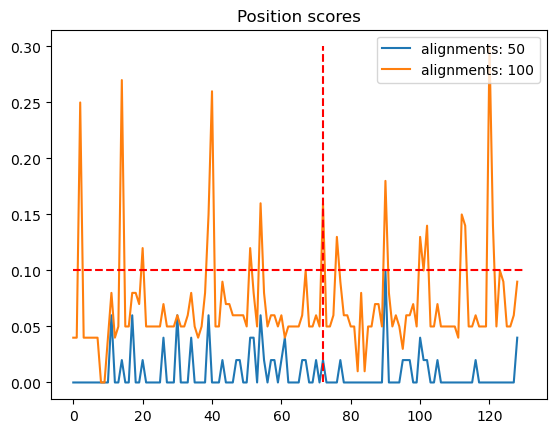

In [59]:
import matplotlib.pyplot as plt



for alignment_considered in [50, 100]: # 250 500, 1000, 5000 
    filename = f"seqdump_{alignment_considered}.txt"
    position_scores = scores(reference_sequence, f'data/{filename}')
    plt.plot(position_scores, label = f'alignments: {alignment_considered}')
    
    
plt.plot( 72*np.ones(100), np.linspace(0, 0.3, 100), 'r--')
plt.plot( np.linspace(0, 130, 100), 0.1*np.ones(100), 'r--')
plt.legend()
plt.title('Position scores')
plt.show()

In [68]:
eps = 0.1
for idx, score in enumerate(position_scores):
    if score > eps and idx>50:
        print(idx, reference_sequence[idx-1])

51 T
54 G
72 S
76 C
90 A
100 S
102 G
112 R
113 N
120 V
121 Q


In [13]:
rmsf_df = pd.read_csv('../automatedSimulation/log/rmsf.dat')
